#### shallow neural networks.
###### Amir Alaeifar

These neural networks describe piecewise linear functions and are expressive enough
to approximate arbitrarily complex relationships between multi-dimensional inputs and
outputs.

Shallow neural networks are functions $y= f[x,\varphi]$ with parameters $\varphi$ that map multivariate inputs $x$ to multivariate outputs $y$.

the idea behind shallow neural networks and activation function:

first lets examine the equation below:
$$y = f[x, \varphi]$$
we introduce ten parameters as follows: $[\varphi_0, \varphi_1, \varphi_2, \varphi_3, \theta_{10}, \theta_{11}, \theta_{20}, \theta_{21}, \theta_{30}, \theta_{31}]$
then We can break down this calculation into three parts: first, we compute three linear
functions of the input data ($\varphi_{10} + \varphi_{11}x$, $\varphi_{20} + \varphi_{21}x$, and $\varphi_{30} + \varphi_{31}x$). Second, we pass the
three results through an **activation function** $a[\bullet]$. as follows:
$$\varphi_0 + a \varphi_1[\theta_{10} + \theta{11}x] + a \varphi_2[\theta_{20} + \theta{21}x] + a \varphi_3[\theta_{30} + \theta{31}x] \space\space\space\space\space\space\space\space\space eq2.1$$
Finally, we weight the three resulting
activations with ϕ1,ϕ2, and ϕ3, sum them, and add an offset ϕ0.

##### rectified linear unit or ReLU
$$
a[z] = \text{ReLU}[z] =
\begin{cases} 
    0 & z < 0 \\
    z & z \geq 0
\end{cases}$$

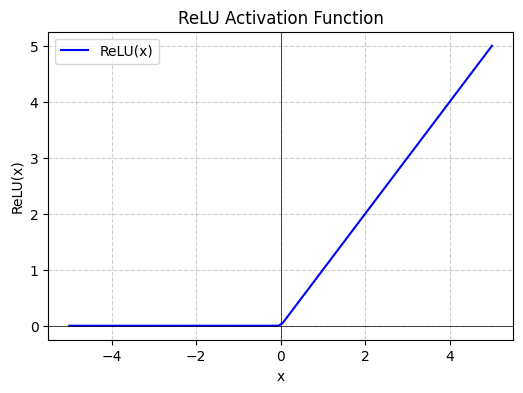

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Generate values for x
x = np.linspace(-5, 5, 100)
y = relu(x)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(x, y, label="ReLU(x)", color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.title("ReLU Activation Function")
plt.legend()
plt.show()

**activation function in details**:
The activation function in hidden layers of a neural network introduces non-linearity into the model, allowing it to learn complex patterns and represent non-linear decision boundaries. Without activation functions, the entire network would behave like a linear transformation, no matter how many layers it has.

visualized version of the eq1.1 -an example neural network with one input, one
output, ReLU activation functions, and three hidden units
<img src=../images/shallow_nn.png height=350 width=350 style="display:block;margin:auto">

so we can generalize the equation 1.1 to have $D$ hidden units and sum them up as:
$$y = \varphi_0 + \sum_{d=1}^{D}\varphi_{d}h_d \space\space\space\space\space\space\space\space\space eq2.2$$
which every $h$ (hidden layers) are defined as:
$$h_d = a[\theta_{d 0} + \theta_{d 1}x]$$

The number of hidden units in a shallow network is a measure of the *network capacity*. With ReLU activation functions, the output of a network with $D$ hidden units has at most $D$ joints and so is a piecewise linear function with at most $D + 1$ linear regions.

**universal approximation theorem** proves that for any continuous function, there exists a
shallow network that can approximate this function to any specified precision, so As the number of regions increases, the model becomes closer and
closer to the continuous function. A neural network with a scalar input creates
one extra linear region per hidden unit. This idea generalizes to functions in
$D_i$ dimensions. The universal approximation theorem proves that, with enough
hidden units, there exists a shallow neural network that can describe any given
continuous function defined on a compact subset of $\R_{D_i}$ to arbitrary precision.

#### Multivariate inputs and outputs

so with the same hidden layers, to have multivariant output (here two ouput as $y = [y_1, y_2]^T$), we simply use a different linear function of the hidden units for each output.
$$y_1 = \varphi_{10} + \varphi_{11}h_1 + \varphi_{12}h_2 + \varphi_{13}h_3 + \varphi_{14}h_4$$
$$y_2 = \varphi_{20} + \varphi_{21}h_1 + \varphi_{22}h_2 + \varphi_{23}h_3 + \varphi_{24}h_4$$

<img src=../images/multi_y_shallow_with_chart.png height=850 width=850 style="display:block;margin:auto">

To cope with multivariate inputs x, we extend the linear relations between the input
and the hidden units. so we have hidden units as follows (with inputs as $x = [x_1, x_2]^T$):
$$h_1 = a[\theta_{10} + \theta_{11}x_1 + \theta_{12}x_2]$$
$$h_2 = a[\theta_{20} + \theta_{21}x_1 + \theta_{22}x_2]$$
$$h_3 = a[\theta_{30} + \theta_{31}x_1 + \theta_{32}x_2]$$

and we define the output as:
$$y = \varphi_0 + \varphi_1 h_1+\varphi_2 h_2+\varphi_3 h_3$$

**intuition of the shallow neural networks**:
Note that as the input dimensions grow, the number of linear regions increases rapidly
.To get a feeling for how rapidly, consider that each hidden unit defines a
hyperplane that delineates the part of space where this unit is active from the part where it is not. If we had the same number of hidden units as input dimensions $D_i$, we could align each hyperplane with one of the coordinate axes
.For two input dimensions, this would divide the space into four quadrants.
For three dimensions, this would create eight octants, and for $D_i$ dimensions, this would
create $2^{D_i}$ orthants. Shallow neural networks usually have more hidden units than input
dimensions, so they typically create more than $2^{D_i}$ linear regions.

We now define a general equation for a shallow neural network $y = f[x,\varphi]$
that maps a multi-dimensional input $x \in \R^{D_i}$ to a multi-dimensional output $y \in \R^{D_o}$
using $h \in \R^D$ hidden units. Each hidden unit is computed as:
$$h_d = a\left[ \theta_{d_0} + \sum_{i=1}^{D_i} \theta_{d_i}x_i \right]$$

and these are combined linearly to create the output:
$$y_i = \varphi_{j0} + \sum_{d=1}^{D} \varphi_{dj}h_d \space\space\space\space\space\space\space\space eq 2.3$$